In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
cleaned_data = pd.read_csv('/Users/maoyanqing/Desktop/challenge/Data-Challenge-URW-HEC/raw_data/cleaned_data.csv')


In [4]:
import pandas as pd

cleaned_data['visit_to_window_flow_daily'] = (
    cleaned_data['store_visits_daily_average'] / cleaned_data['store_window_flow_daily_average']
)

cleaned_data['visit_to_window_flow_monthly'] = (
    cleaned_data['store_visits_monthly_average'] / cleaned_data['store_window_flow_monthly_average']
)

# 按照 store_branch_level_1 分组
grouped_data = cleaned_data.groupby('store_branch_level_1')

# 计算每日和每月的 visit_to_window_flow 分布
daily_distribution = grouped_data['visit_to_window_flow_daily'].describe()
monthly_distribution = grouped_data['visit_to_window_flow_monthly'].describe()

# 打印结果
print("Visit to Window Flow Daily Distribution by Store Branch Level 1:")
print(daily_distribution)

print("\nVisit to Window Flow Monthly Distribution by Store Branch Level 1:")
print(monthly_distribution)


Visit to Window Flow Daily Distribution by Store Branch Level 1:
                                count      mean       std       min       25%  \
store_branch_level_1                                                            
Auto                              4.0  0.011287  0.010082  0.005180  0.005959   
Bags & Footwear & Accessories   166.0  0.029034  0.025953  0.002502  0.012243   
Culture & Media & Technology    137.0  0.043073  0.057351  0.000398  0.008214   
Department Stores                 6.0  0.157092  0.078401  0.091232  0.101172   
Entertainment                    24.0  0.048296  0.057802  0.002490  0.009632   
Fashion apparel                 548.0  0.042097  0.056208  0.000000  0.011615   
Fitness                           4.0  0.156598  0.235786  0.005568  0.008023   
Food & Beverage Services        322.0  0.041501  0.062205  0.001540  0.012715   
Food Stores & Mass Merchandise   25.0  0.152193  0.183107  0.001924  0.017432   
Gifts                            60.0  0.048

/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/97912235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='store_branch_level_1', y='visit_to_window_flow_daily', palette='Set2')


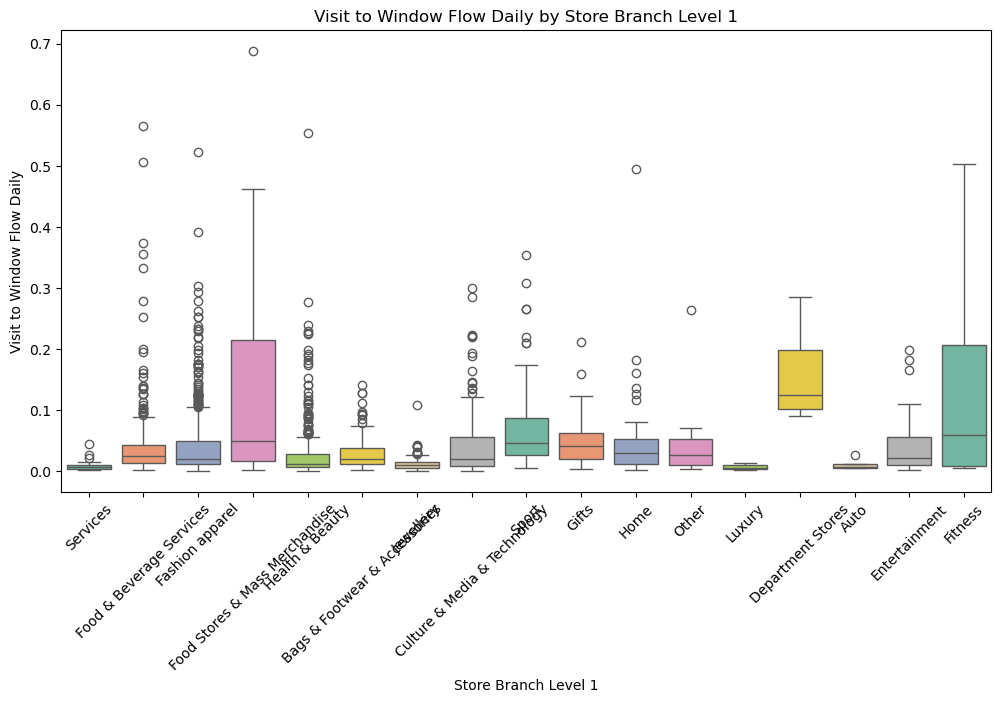

/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/97912235.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='store_branch_level_1', y='visit_to_window_flow_monthly', palette='Set2')


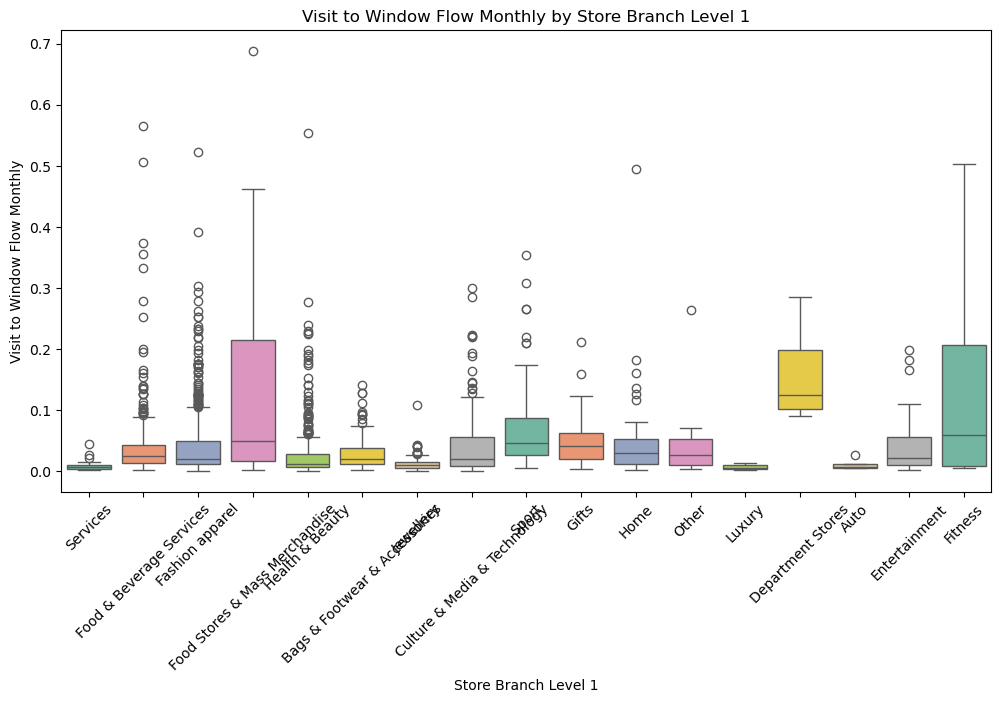

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette("Set2")  


plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='store_branch_level_1', y='visit_to_window_flow_daily', palette='Set2')
plt.title('Visit to Window Flow Daily by Store Branch Level 1')
plt.xticks(rotation=45)
plt.ylabel('Visit to Window Flow Daily')
plt.xlabel('Store Branch Level 1')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='store_branch_level_1', y='visit_to_window_flow_monthly', palette='Set2')
plt.title('Visit to Window Flow Monthly by Store Branch Level 1')
plt.xticks(rotation=45)
plt.ylabel('Visit to Window Flow Monthly')
plt.xlabel('Store Branch Level 1')
plt.show()



In [ ]:

cleaned_data['store_total_window_flow'] = cleaned_data['store_total_window_flow'].replace(0, float('nan'))

sales_efficiency_by_country = cleaned_data.groupby('mall_country').apply(
    lambda group: (group['store_sales_r12m'] / group['store_total_window_flow']).mean()
).dropna().sort_values(ascending=False)

sales_efficiency_by_country_df = sales_efficiency_by_country.reset_index()
sales_efficiency_by_country_df.columns = ['mall_country', 'sales_efficiency']

print(sales_efficiency_by_country_df)


     mall_country  sales_efficiency
0          Sweden          8.782750
1  Czech Republic          7.570527
2          France          5.036180
3     Netherlands          3.237585
4         Austria          1.979820
5         Germany          1.595080
6          Poland          1.369570
7           Spain          0.848432
8  United Kingdom          0.758431


/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/3382214232.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_efficiency_by_country = cleaned_data.groupby('mall_country').apply(


In [ ]:

average_sales_by_country = cleaned_data.groupby('mall_country')['store_sales_r12m'].mean().sort_values(ascending=False)
average_sales_by_country_df = average_sales_by_country.reset_index()
average_sales_by_country_df.columns = ['mall_country', 'average_annual_sales']

print(average_sales_by_country_df)


     mall_country  average_annual_sales
0          Sweden          9.476015e+06
1  Czech Republic          7.348331e+06
2         Austria          5.464705e+06
3          Poland          5.453157e+06
4          France          5.412629e+06
5     Netherlands          4.864651e+06
6  United Kingdom          3.860880e+06
7         Germany          3.754176e+06
8           Spain          3.393071e+06


/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/3392979076.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


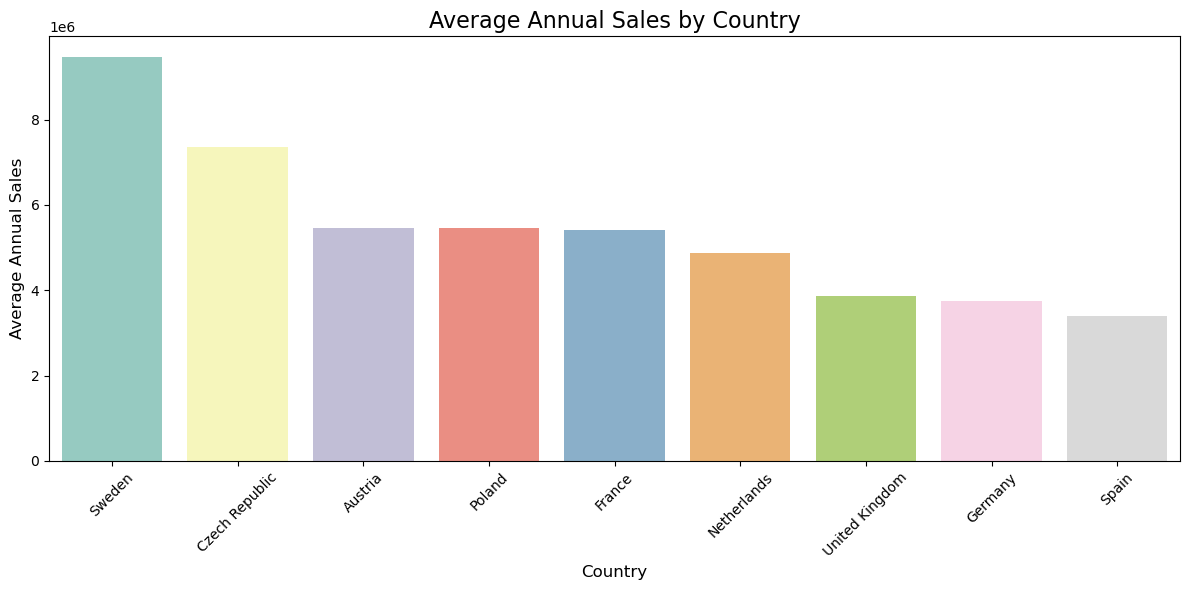

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average annual sales by country with different colors
plt.figure(figsize=(12, 6))
sns.barplot(
    data=average_sales_by_country_df,
    x='mall_country',
    y='average_annual_sales',
    palette='Set3'  # Use a colorful palette
)
plt.title('Average Annual Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Annual Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
branch_sales_stats_by_country = (
    cleaned_data.groupby(['mall_country', 'store_branch_level_1'])['store_sales_r12m']
    .agg(total_sales='sum', average_sales='mean')
    .reset_index()
    .sort_values(['mall_country', 'total_sales'], ascending=[True, False])
)

top_5_branches_with_avg_by_country = branch_sales_stats_by_country.groupby('mall_country').head(5)


print(top_5_branches_with_avg_by_country)


       mall_country            store_branch_level_1   total_sales  \
4           Austria                 Fashion apparel  3.545068e+08   
9           Austria                            Home  2.904179e+08   
2           Austria    Culture & Media & Technology  1.266525e+08   
5           Austria        Food & Beverage Services  1.175736e+08   
1           Austria   Bags & Footwear & Accessories  9.861646e+07   
17   Czech Republic                 Fashion apparel  5.503900e+08   
26   Czech Republic                           Sport  1.542677e+08   
18   Czech Republic        Food & Beverage Services  1.189341e+08   
20   Czech Republic                           Gifts  1.001359e+08   
21   Czech Republic                 Health & Beauty  4.363552e+07   
31           France                 Fashion apparel  1.189693e+09   
33           France        Food & Beverage Services  6.297085e+08   
36           France                 Health & Beauty  6.232938e+08   
27           France   Bags & Footw

/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/3453894393.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/3453894393.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/3453894393.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/3453894393.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

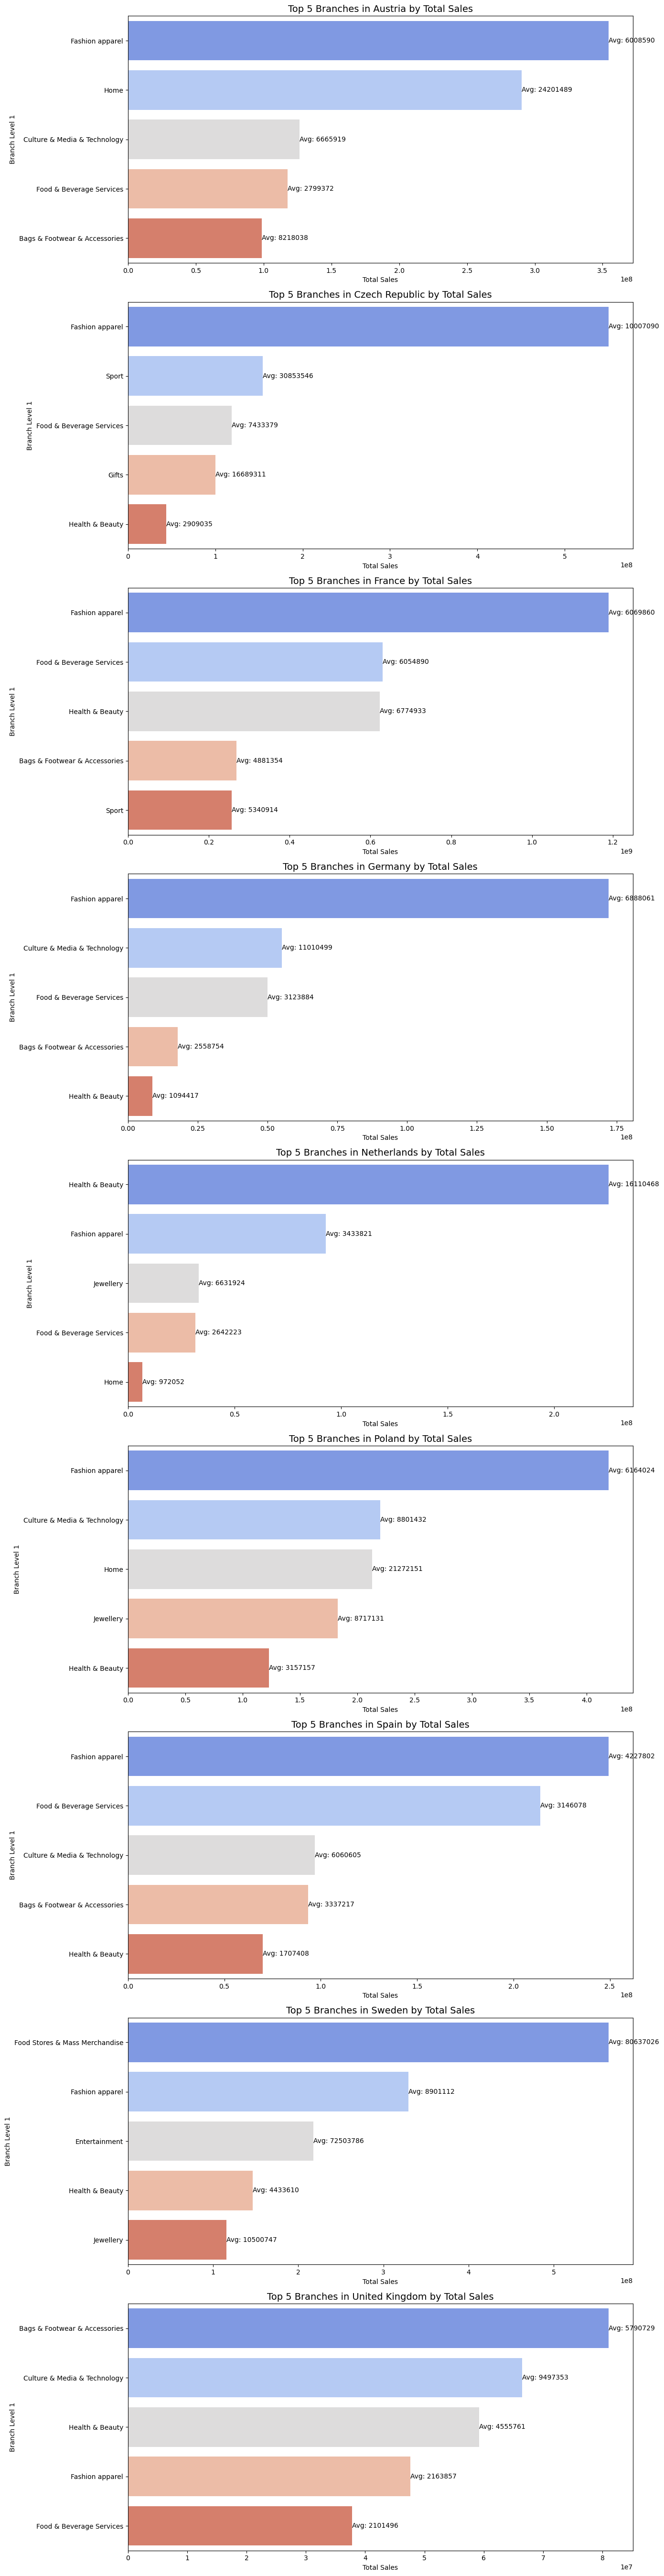

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate through each country to visualize the top 5 branches separately
countries = top_5_branches_with_avg_by_country['mall_country'].unique()

plt.figure(figsize=(14, len(countries) * 6))
for i, country in enumerate(countries, start=1):
    country_data = top_5_branches_with_avg_by_country[top_5_branches_with_avg_by_country['mall_country'] == country]
    plt.subplot(len(countries), 1, i)
    sns.barplot(
        data=country_data,
        x='total_sales',
        y='store_branch_level_1',
        palette='coolwarm',
        label='Total Sales'
    )
    for j in range(len(country_data)):
        plt.text(country_data['total_sales'].iloc[j], j, f"Avg: {country_data['average_sales'].iloc[j]:.0f}", 
                 va='center', ha='left', fontsize=10, color='black')
    plt.title(f"Top 5 Branches in {country} by Total Sales", fontsize=14)
    plt.xlabel("Total Sales")
    plt.ylabel("Branch Level 1")
    plt.tight_layout()

plt.show()


/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/2932316274.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/2932316274.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/2932316274.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/2932316274.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

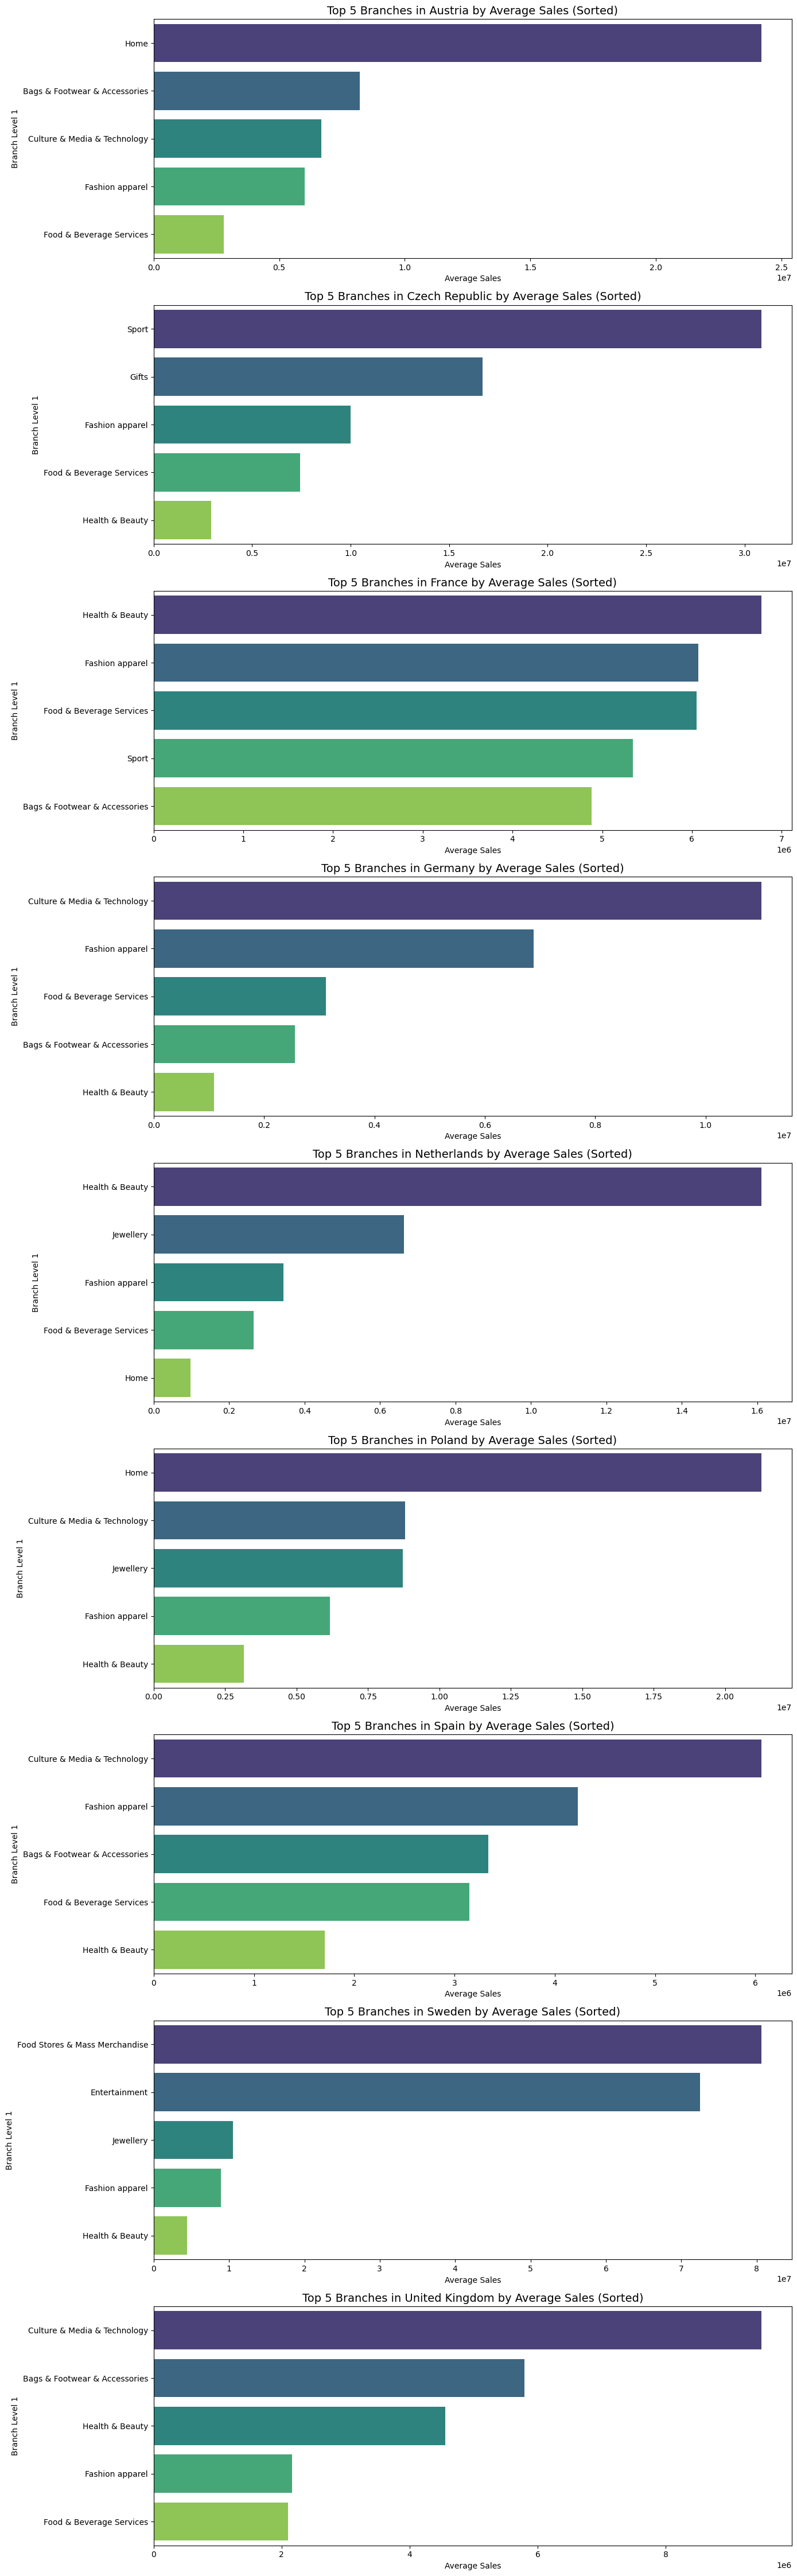

In [12]:
# Revise the code to ensure each country's bars are sorted in descending order by average sales

# Iterate through each country to visualize the top 5 branches with sorted bars
countries = top_5_branches_with_avg_by_country['mall_country'].unique()

# Create a layout to accommodate multiple country visualizations
plt.figure(figsize=(14, len(countries) * 5))
for i, country in enumerate(countries, start=1):
    # Filter data for the current country and sort by average_sales in descending order
    country_data = top_5_branches_with_avg_by_country[
        top_5_branches_with_avg_by_country['mall_country'] == country
    ].sort_values('average_sales', ascending=False)
    
    # Create a subplot for each country
    plt.subplot(len(countries), 1, i)
    sns.barplot(
        data=country_data,
        x='average_sales',
        y='store_branch_level_1',
        palette='viridis',
    )
    
    # Add titles and labels
    plt.title(f"Top 5 Branches in {country} by Average Sales (Sorted)", fontsize=14)
    plt.xlabel("Average Sales")
    plt.ylabel("Branch Level 1")

plt.tight_layout()
plt.show()


In [15]:
# 计算每个商场的年度总销售额
annual_sales_by_mall = (
    cleaned_data.groupby('mall_name')['store_sales_r12m']
    .sum()
    .reset_index()
    .sort_values('store_sales_r12m', ascending=False)
)

# 获取年度销售额最高的前 10 个商场
top_10_malls = annual_sales_by_mall.head(10)

# 合并商场国家信息以识别前 10 商场所在的国家
top_10_malls_with_country = top_10_malls.merge(
    cleaned_data[['mall_name', 'mall_country']].drop_duplicates(),
    on='mall_name',
    how='left'
)

# 统计每个国家中前 10 商场的数量
top_10_mall_countries = top_10_malls_with_country['mall_country'].value_counts()

# 转换为 DataFrame 方便展示
top_10_mall_countries_df = top_10_mall_countries.reset_index()
top_10_mall_countries_df.columns = ['mall_country', 'mall_count']

# 显示结果
print(top_10_mall_countries_df)


     mall_country  mall_count
0          France           4
1         Austria           2
2          Poland           2
3          Sweden           1
4  Czech Republic           1


/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/2263986796.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


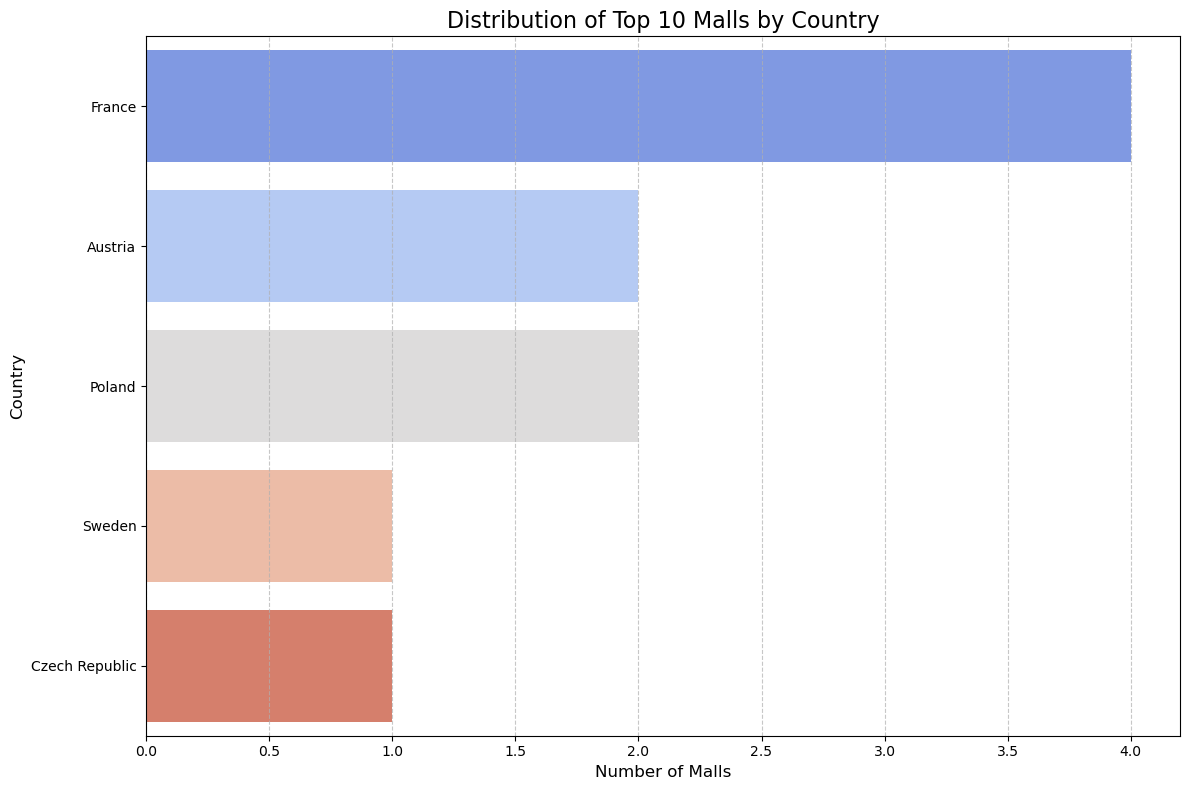

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by mall count for a better visual order
top_10_mall_countries_df = top_10_mall_countries_df.sort_values('mall_count', ascending=False)

# Plot the distribution of top 100 malls by country
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_mall_countries_df,
    x='mall_count',
    y='mall_country',
    palette='coolwarm'
)
plt.title('Distribution of Top 10 Malls by Country', fontsize=16)
plt.xlabel('Number of Malls', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/1997930008.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


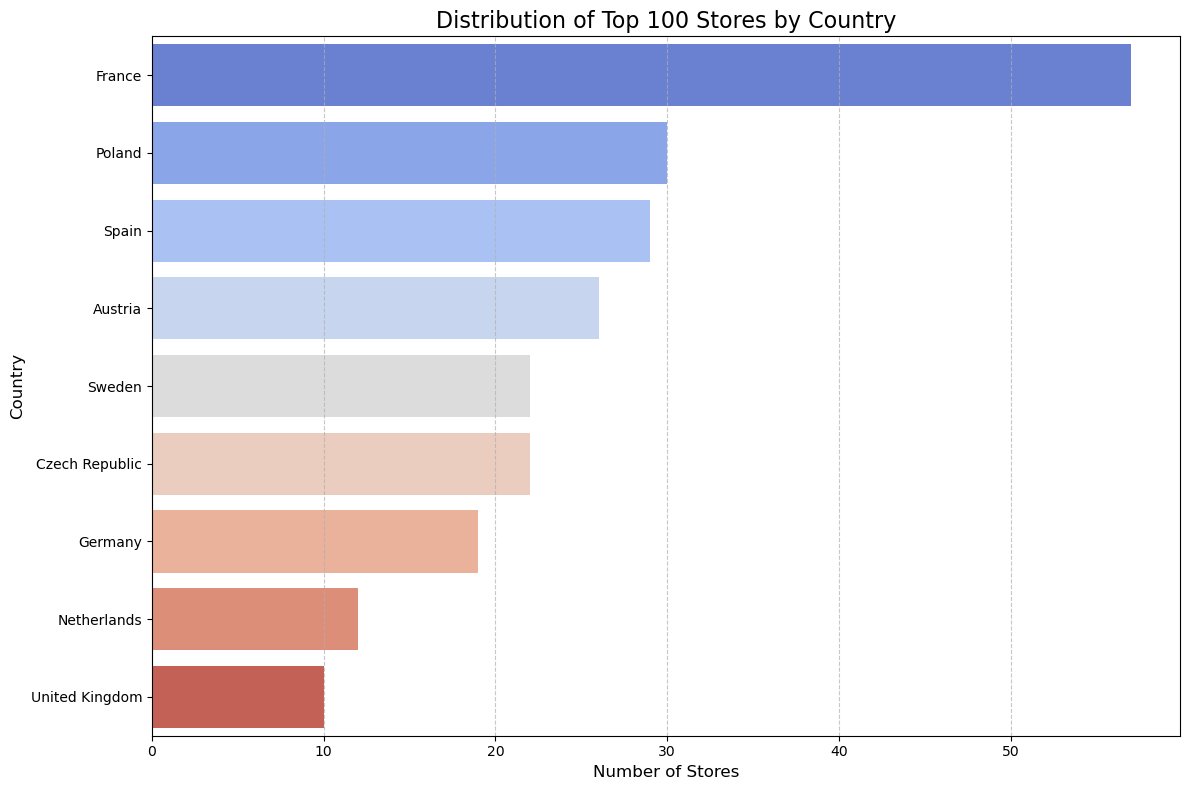

In [19]:
# Calculate total sales for each store
total_sales_by_store = (
    cleaned_data.groupby('store_name')['store_sales_r12m']
    .sum()
    .reset_index()
    .sort_values('store_sales_r12m', ascending=False)
)

# Get the top 100 stores by total sales
top_100_stores = total_sales_by_store.head(100)

# Merge with mall country information to find the countries of the top stores
top_100_stores_with_country = top_100_stores.merge(
    cleaned_data[['store_name', 'mall_country']].drop_duplicates(),
    on='store_name',
    how='left'
)

# Count the number of top 100 stores in each country
top_100_store_countries = top_100_stores_with_country['mall_country'].value_counts()

# Convert to a DataFrame for better visualization
top_100_store_countries_df = top_100_store_countries.reset_index()
top_100_store_countries_df.columns = ['mall_country', 'store_count']

top_100_store_countries_df = top_100_store_countries_df.sort_values('store_count', ascending=False)

# Plot the distribution of top 100 stores by country
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_100_store_countries_df,
    x='store_count',
    y='mall_country',
    palette='coolwarm'
)
plt.title('Distribution of Top 100 Stores by Country', fontsize=16)
plt.xlabel('Number of Stores', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
print(top_100_store_countries_df)

     mall_country  store_count
0          France           57
1          Poland           30
2           Spain           29
3         Austria           26
4          Sweden           22
5  Czech Republic           22
6         Germany           19
7     Netherlands           12
8  United Kingdom           10


<Figure size 1600x1000 with 0 Axes>

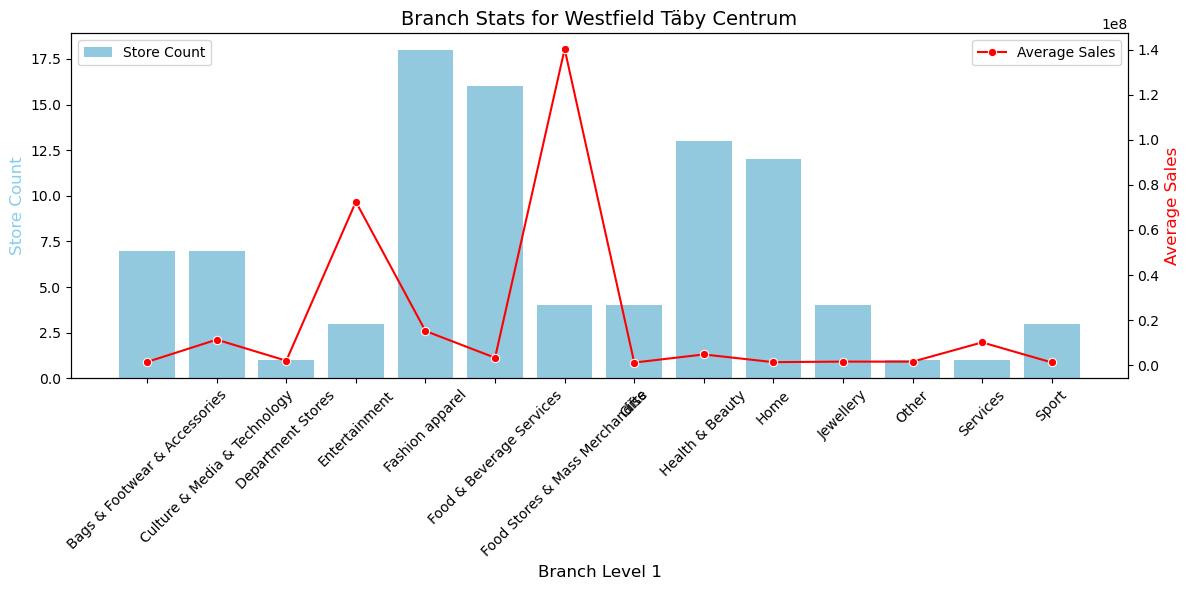

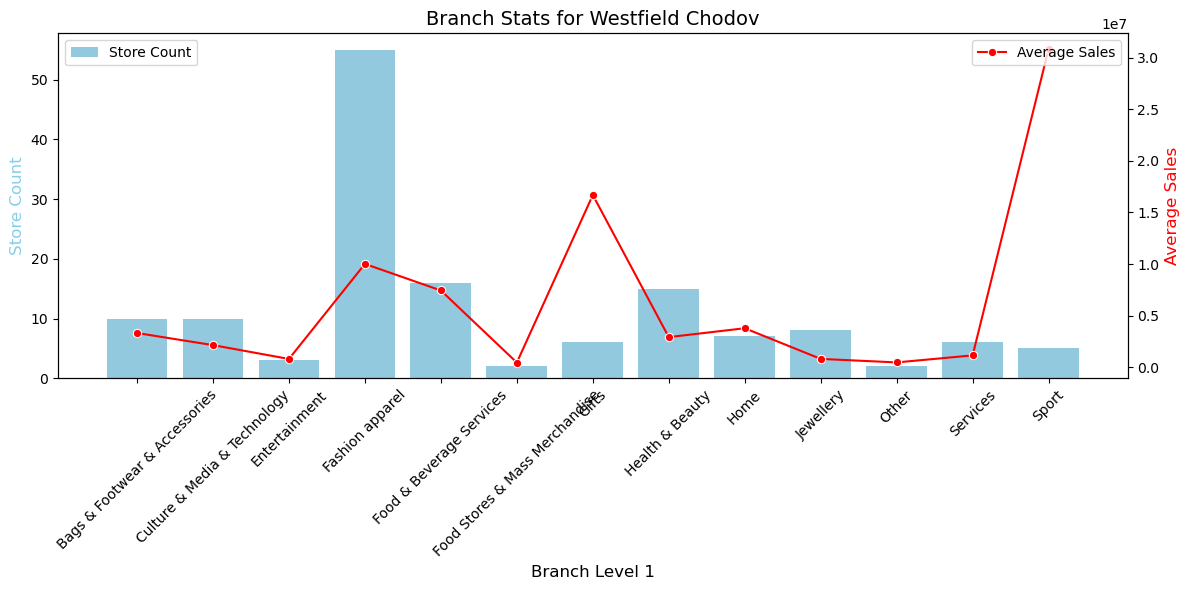

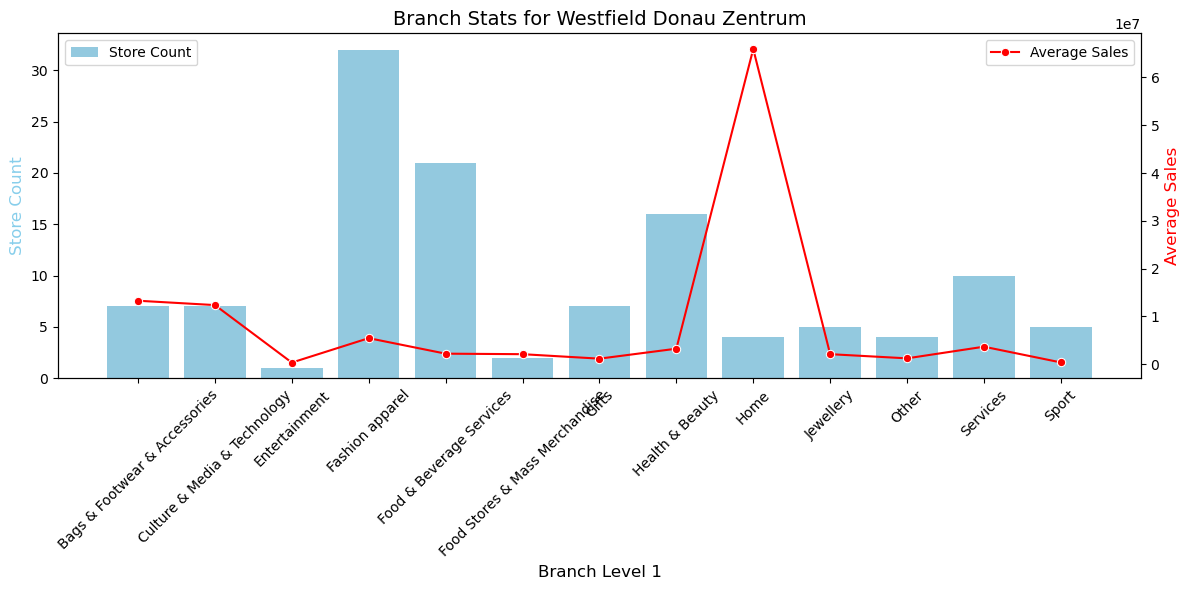

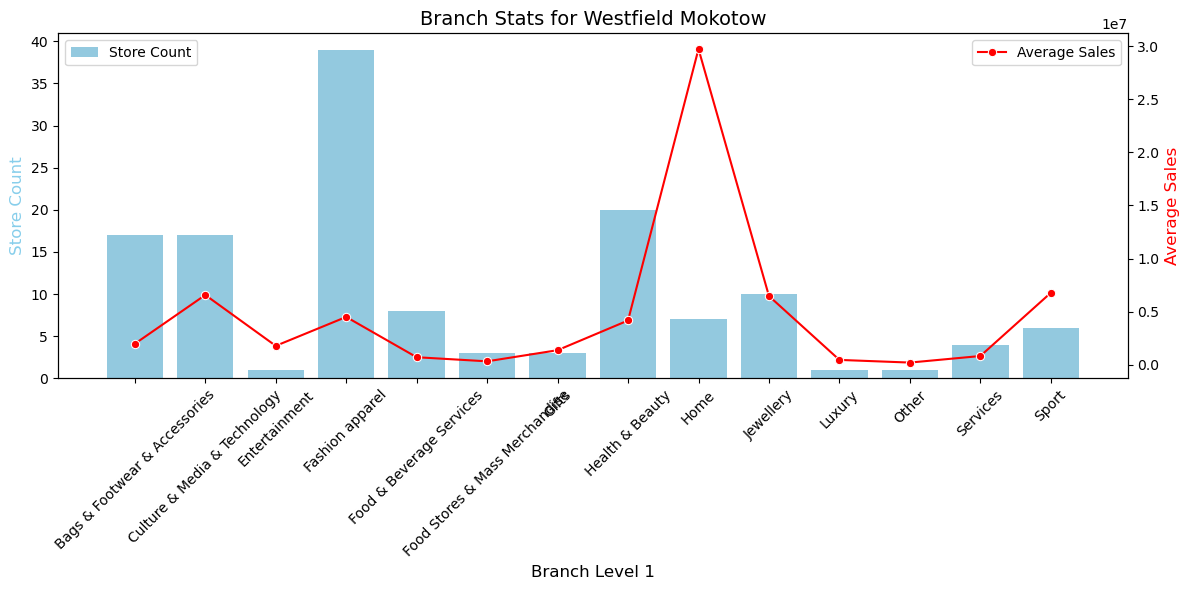

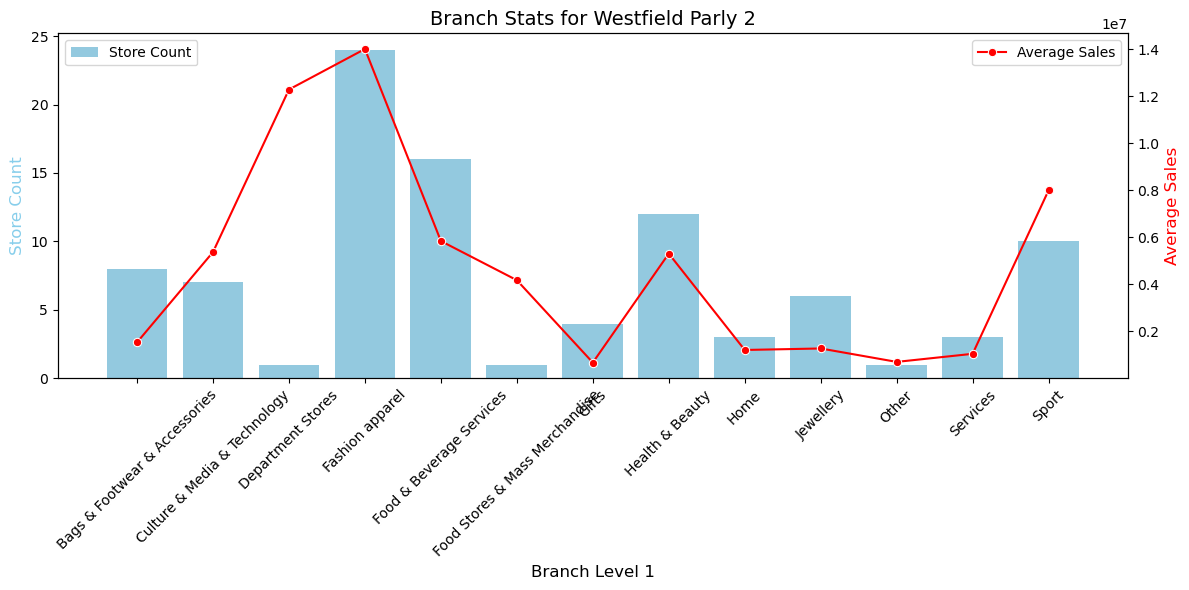

In [24]:
# Get the top 5 malls by total annual sales
top_5_malls = annual_sales_by_mall.head(5)

# Filter data for the top 5 malls
top_5_malls_data = cleaned_data[cleaned_data['mall_name'].isin(top_5_malls['mall_name'])]

# Calculate store count and average annual sales for each branch in the top 5 malls
branch_stats_top_5_malls = (
    top_5_malls_data.groupby(['mall_name', 'store_branch_level_1'])['store_sales_r12m']
    .agg(store_count='count', average_sales='mean')
    .reset_index()
)

# Visualize the results
plt.figure(figsize=(16, 10))
for i, mall in enumerate(top_5_malls['mall_name'], start=1):
    mall_data = branch_stats_top_5_malls[branch_stats_top_5_malls['mall_name'] == mall]
    
    # Create a bar plot with dual axes for average sales and store count
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()
    
    sns.barplot(
        data=mall_data,
        x='store_branch_level_1',
        y='store_count',
        ax=ax1,
        color='skyblue',
        label='Store Count'
    )
    sns.lineplot(
        data=mall_data,
        x='store_branch_level_1',
        y='average_sales',
        ax=ax2,
        color='red',
        marker='o',
        label='Average Sales'
    )
    
    ax1.set_title(f"Branch Stats for {mall}", fontsize=14)
    ax1.set_xlabel("Branch Level 1", fontsize=12)
    ax1.set_ylabel("Store Count", fontsize=12, color='skyblue')
    ax2.set_ylabel("Average Sales", fontsize=12, color='red')
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()


<Figure size 1600x1000 with 0 Axes>

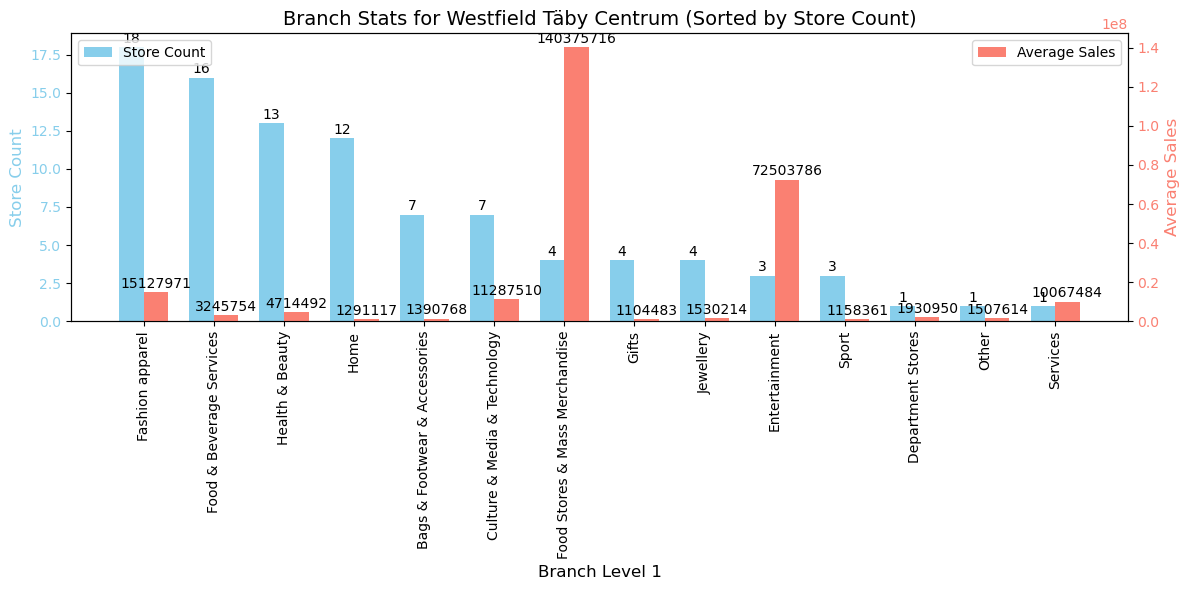

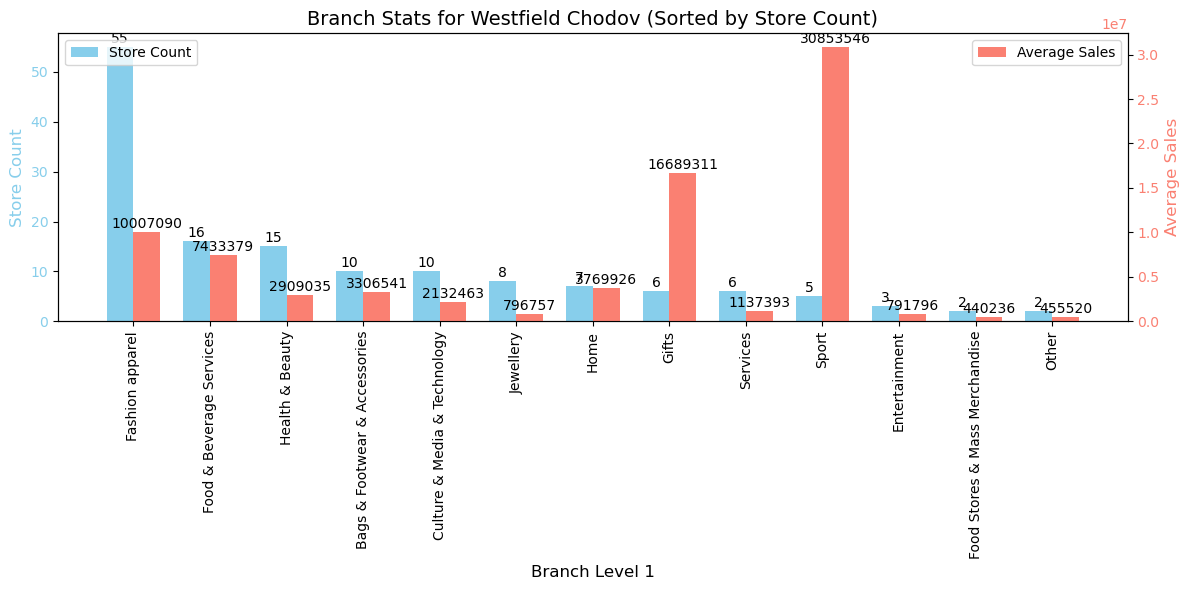

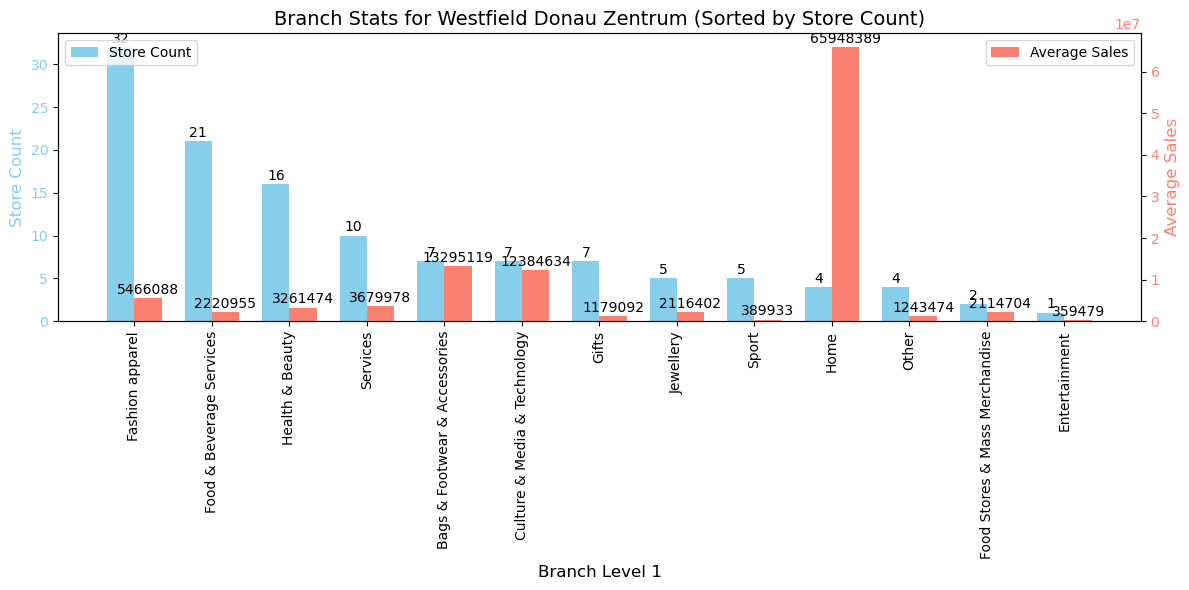

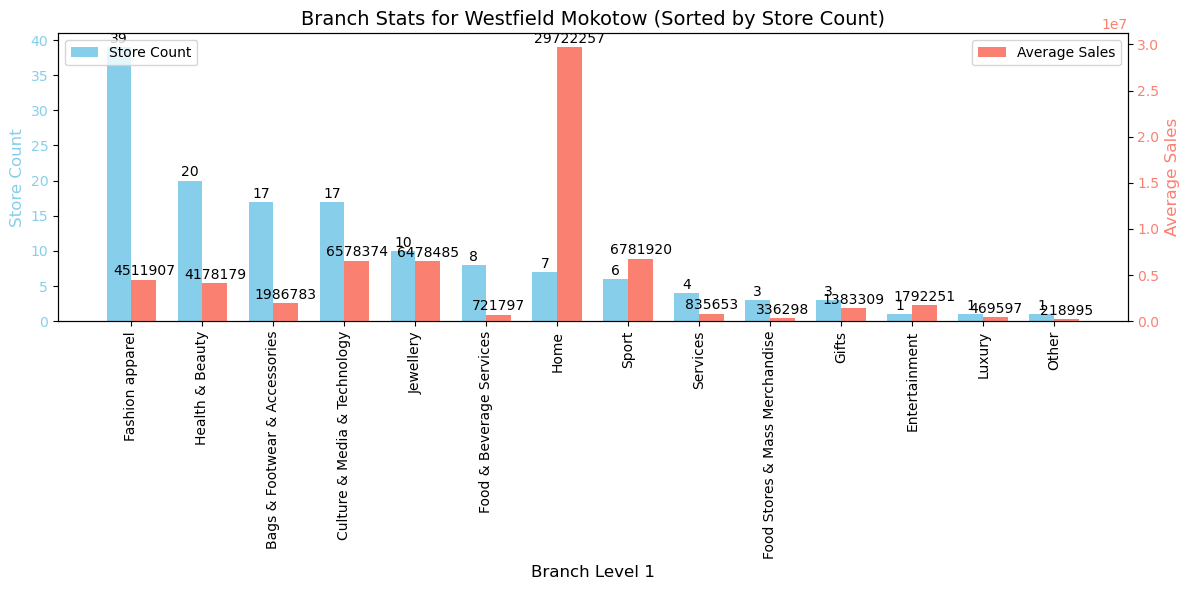

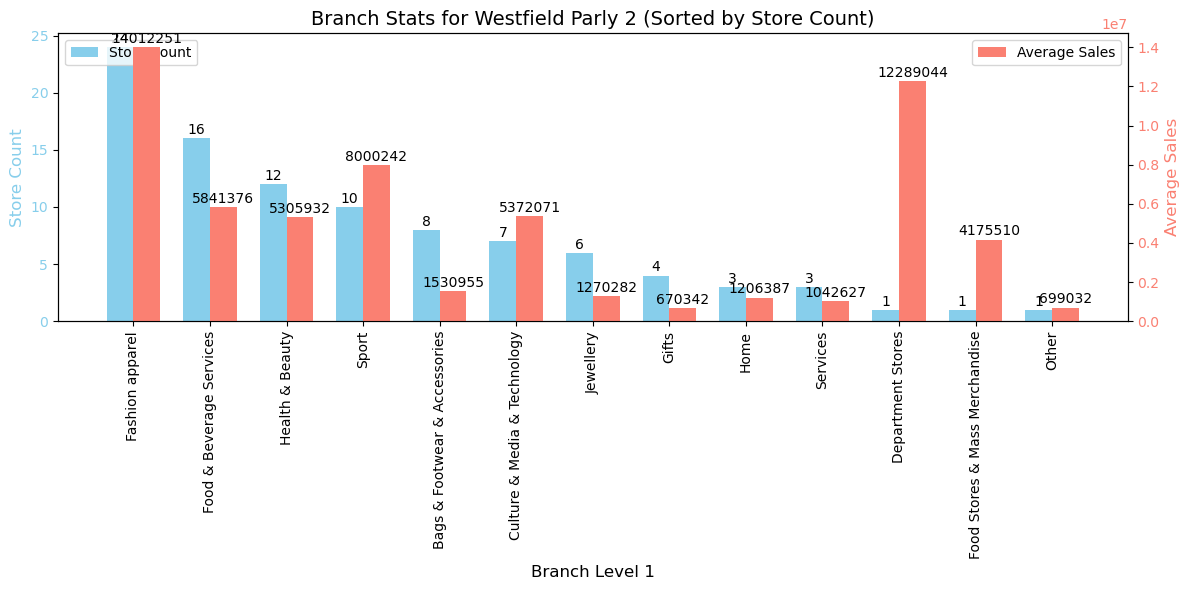

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# 遍历前五名商场
for i, mall in enumerate(top_5_malls['mall_name'], start=1):
    # 筛选当前商场数据，并按 store_count 降序排列
    mall_data = branch_stats_top_5_malls[branch_stats_top_5_malls['mall_name'] == mall].sort_values(
        'store_count', ascending=False
    )
    
    # 设置柱状图的 x 位置
    x = np.arange(len(mall_data))  # 改为 mall_data 的索引
    width = 0.35  # 柱宽度
    
    # 创建主轴和次坐标轴
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()  # 添加次坐标轴
    
    # 绘制店铺数量（主轴）
    bar1 = ax1.bar(x - width/2, mall_data['store_count'], width, label='Store Count', color='skyblue')
    ax1.set_ylabel("Store Count", fontsize=12, color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    
    # 绘制平均销售额（次坐标轴）
    bar2 = ax2.bar(x + width/2, mall_data['average_sales'], width, label='Average Sales', color='salmon')
    ax2.set_ylabel("Average Sales", fontsize=12, color='salmon')
    ax2.tick_params(axis='y', labelcolor='salmon')
    
    # 添加标题和 x 轴标签
    ax1.set_title(f"Branch Stats for {mall} (Sorted by Store Count)", fontsize=14)
    ax1.set_xlabel("Branch Level 1", fontsize=12)
    ax1.set_xticks(x)  # 确保 x 和 xticklabels 一一对应
    ax1.set_xticklabels(mall_data['store_branch_level_1'], rotation=90)
    
    # 添加图例
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # 添加店铺数量的注释
    for bar in bar1:
        height = bar.get_height()
        ax1.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)
    
    # 添加平均销售额的注释
    for bar in bar2:
        height = bar.get_height()
        ax2.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()


In [ ]:
# 计算每家商店的年度总销售额，按降序排序
top_100_stores_by_sales = (
    cleaned_data.groupby('store_name')['store_sales_r12m']
    .sum()
    .reset_index()
    .sort_values('store_sales_r12m', ascending=False)
    .head(100)  
)


top_100_stores_data = top_100_stores_by_sales.merge(
    cleaned_data[['store_name', 'store_branch_level_1', 'mall_name', 'mall_country']].drop_duplicates(),
    on='store_name',
    how='left'
)

branch_distribution = top_100_stores_data['store_branch_level_1'].value_counts()

country_distribution = top_100_stores_data['mall_country'].value_counts()

branch_distribution_df = branch_distribution.reset_index()
branch_distribution_df.columns = ['store_branch_level_1', 'store_count']

country_distribution_df = country_distribution.reset_index()
country_distribution_df.columns = ['mall_country', 'store_count']

print("Top 100 Stores by Branch Distribution:")
print(branch_distribution_df)

print("\nTop 100 Stores by Country Distribution:")
print(country_distribution_df)


Top 100 Stores by Branch Distribution:
              store_branch_level_1  store_count
0                  Fashion apparel          131
1                  Health & Beauty           76
2         Food & Beverage Services           41
3                            Sport           32
4    Bags & Footwear & Accessories           26
5     Culture & Media & Technology           23
6                             Home            9
7                            Gifts            9
8                        Jewellery            8
9                    Entertainment            3
10               Department Stores            2
11  Food Stores & Mass Merchandise            1
12                           Other            1

Top 100 Stores by Country Distribution:
     mall_country  store_count
0          France          160
1          Poland           42
2           Spain           40
3         Austria           31
4          Sweden           26
5  Czech Republic           22
6         Germany           19


In [ ]:

top_100_stores_by_sales = (
    cleaned_data.groupby('store_name')['store_sales_r12m']
    .sum()
    .reset_index()
    .sort_values('store_sales_r12m', ascending=False)
    .head(100)  
)


top_100_stores_data = top_100_stores_by_sales.merge(
    cleaned_data[['store_name', 'store_branch_level_1', 'mall_country']].drop_duplicates(),
    on='store_name',
    how='inner'
)


branch_distribution = top_100_stores_data['store_branch_level_1'].value_counts()


country_distribution = top_100_stores_data['mall_country'].value_counts()


branch_distribution_df = branch_distribution.reset_index()
branch_distribution_df.columns = ['store_branch_level_1', 'store_count']

country_distribution_df = country_distribution.reset_index()
country_distribution_df.columns = ['mall_country', 'store_count']


print("Top 100 Stores by Branch Distribution:")
print(branch_distribution_df)

print("\nTop 100 Stores by Country Distribution:")
print(country_distribution_df)


Top 100 Stores by Branch Distribution:
              store_branch_level_1  store_count
0                  Fashion apparel           83
1                  Health & Beauty           44
2         Food & Beverage Services           28
3                            Sport           17
4    Bags & Footwear & Accessories           17
5     Culture & Media & Technology           13
6                             Home            7
7                            Gifts            7
8                        Jewellery            6
9                    Entertainment            2
10  Food Stores & Mass Merchandise            1
11               Department Stores            1
12                           Other            1

Top 100 Stores by Country Distribution:
     mall_country  store_count
0          France           57
1          Poland           30
2           Spain           29
3         Austria           26
4          Sweden           22
5  Czech Republic           22
6         Germany           19


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 649 to 910
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_name        100 non-null    object 
 1   store_sales_r12m  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:

store_branch_counts = cleaned_data.groupby('store_name')['store_branch_level_1'].nunique()


stores_with_multiple_branches = store_branch_counts[store_branch_counts > 1]


print(f"Number of stores with multiple branches: {len(stores_with_multiple_branches)}")
print(stores_with_multiple_branches)


Number of stores with multiple branches: 10
store_name
store_1095    2
store_144     2
store_177     2
store_212     2
store_365     2
store_453     2
store_783     2
store_899     2
store_94      2
store_971     2
Name: store_branch_level_1, dtype: int64


In [ ]:
# Calculate total annual sales by store and sort in descending order
top_100_stores_by_sales = (
    cleaned_data.groupby('store_name')['store_sales_r12m']
    .sum()
    .reset_index()
    .sort_values('store_sales_r12m', ascending=False)
    .head(100)  # Select top 100 stores by sales
)

# Merge with branch and mall information for analysis
top_100_stores_data = top_100_stores_by_sales.merge(
    cleaned_data[['store_name', 'store_branch_level_1', 'mall_country']].drop_duplicates(),
    on='store_name',
    how='left'
)

# Remove duplicate stores within the same branch
top_100_stores_unique = top_100_stores_data.drop_duplicates(subset=['store_name', 'store_branch_level_1'])

# Analyze the distribution of top 100 stores by branch and country
branch_distribution = top_100_stores_unique['store_branch_level_1'].value_counts()
country_distribution = top_100_stores_unique['mall_country'].value_counts()

# Convert distributions to DataFrames for easier visualization
branch_distribution_df = branch_distribution.reset_index()
branch_distribution_df.columns = ['store_branch_level_1', 'store_count']

country_distribution_df = country_distribution.reset_index()
country_distribution_df.columns = ['mall_country', 'store_count']


print("Top 100 Unique Stores by Branch Distribution:")
print(branch_distribution_df)

print("\nTop 100 Unique Stores by Country Distribution:")
print(country_distribution_df)

Top 100 Unique Stores by Branch Distribution:
              store_branch_level_1  store_count
0                  Fashion apparel           37
1                  Health & Beauty           12
2         Food & Beverage Services           12
3    Bags & Footwear & Accessories            9
4     Culture & Media & Technology            8
5                            Sport            6
6                        Jewellery            6
7                             Home            4
8                    Entertainment            2
9   Food Stores & Mass Merchandise            1
10                           Gifts            1
11               Department Stores            1
12                           Other            1

Top 100 Unique Stores by Country Distribution:
     mall_country  store_count
0          France           40
1         Germany           11
2          Poland           11
3          Sweden           10
4         Austria            9
5           Spain            8
6  Czech Republic

/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/2406515507.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


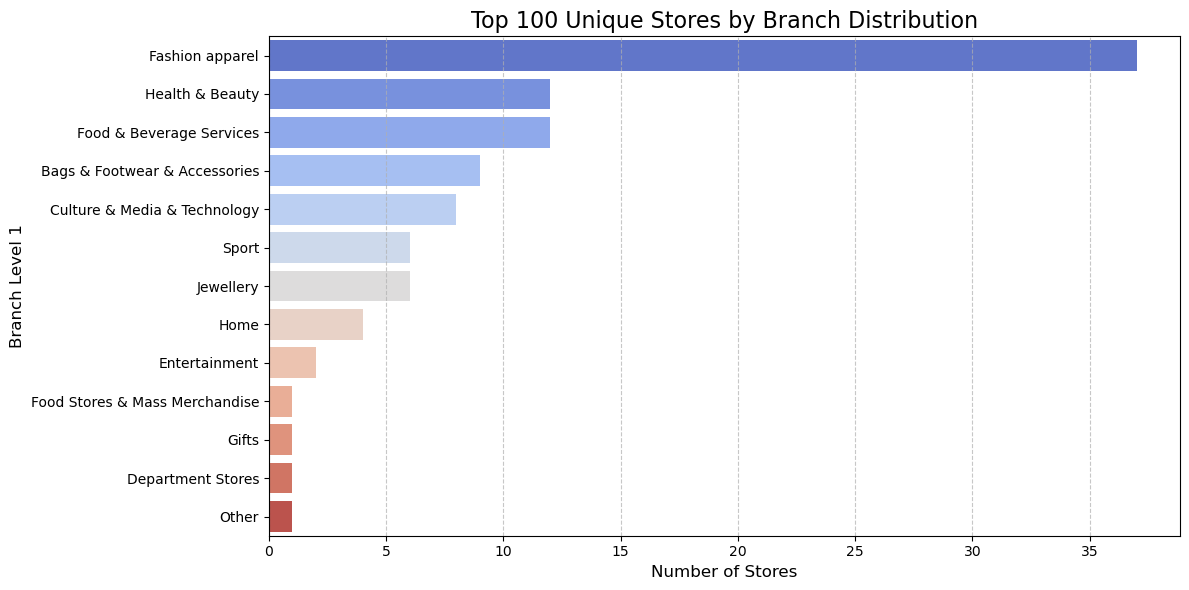

/var/folders/qw/x5g8nkt94l111qjhlp6_rgv40000gn/T/ipykernel_45391/2406515507.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


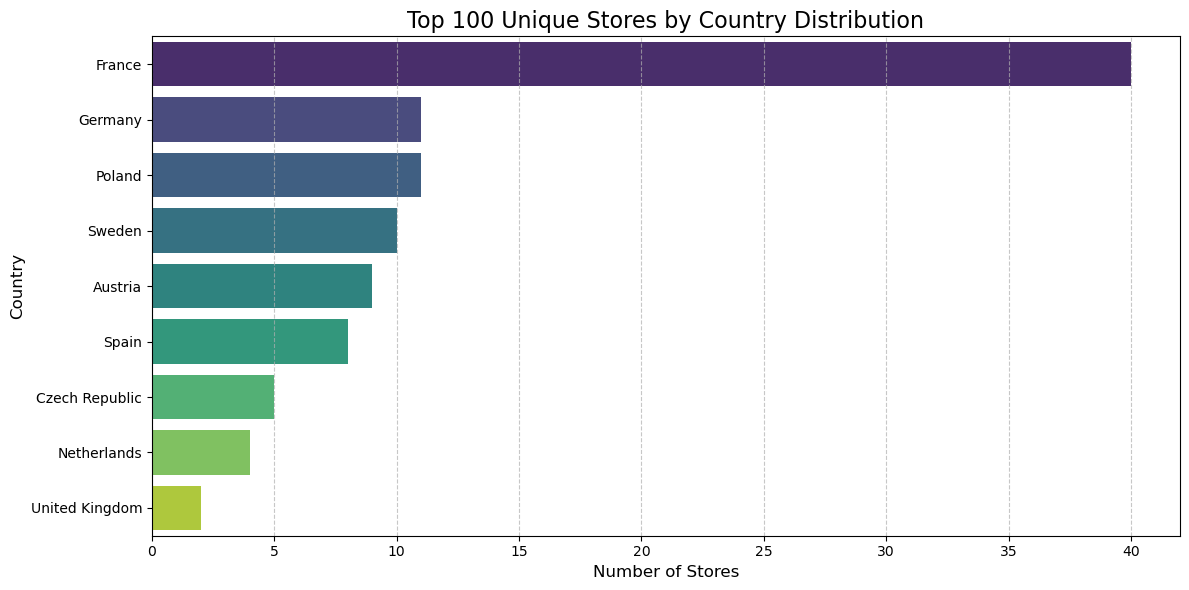

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort branch and country distributions for better visualization
branch_distribution_df = branch_distribution_df.sort_values('store_count', ascending=False)
country_distribution_df = country_distribution_df.sort_values('store_count', ascending=False)

# Create a bar chart for branch distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    data=branch_distribution_df,
    x='store_count',
    y='store_branch_level_1',
    palette='coolwarm'
)
plt.title('Top 100 Unique Stores by Branch Distribution', fontsize=16)
plt.xlabel('Number of Stores', fontsize=12)
plt.ylabel('Branch Level 1', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a bar chart for country distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_distribution_df,
    x='store_count',
    y='mall_country',
    palette='viridis'
)
plt.title('Top 100 Unique Stores by Country Distribution', fontsize=16)
plt.xlabel('Number of Stores', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
branch_sales_per_store = (
    cleaned_data.groupby('store_branch_level_1')['store_sales_r12m']
    .agg(total_sales='sum', store_count='count')
    .reset_index()
)


branch_sales_per_store['sales_per_store'] = branch_sales_per_store['total_sales'] / branch_sales_per_store['store_count']


branch_sales_per_store_sorted = branch_sales_per_store.sort_values('sales_per_store', ascending=False)


print(branch_sales_per_store_sorted)


              store_branch_level_1   total_sales  store_count  sales_per_store
8   Food Stores & Mass Merchandise  6.038463e+08           25     2.415385e+07
4                    Entertainment  2.822534e+08           24     1.176056e+07
3                Department Stores  6.429929e+07            6     1.071655e+07
11                            Home  8.009576e+08           89     8.999523e+06
5                  Fashion apparel  3.405044e+09          548     6.213584e+06
2     Culture & Media & Technology  8.117973e+08          137     5.925528e+06
16                           Sport  6.135688e+08          114     5.382183e+06
12                       Jewellery  5.835621e+08          119     4.903883e+06
10                 Health & Beauty  1.392203e+09          294     4.735384e+06
1    Bags & Footwear & Accessories  6.847996e+08          166     4.125299e+06
7         Food & Beverage Services  1.313507e+09          322     4.079213e+06
9                            Gifts  1.889046e+08    